# Adler project

Work on EAGLE lens models: source reconstructions, synthetic imaging, comparison to true maps, ...


### Imports
`gleam` imports must happen from root of the directory, i.e. `/Users/phdenzel/adler/`.
This is why `..` is appended to the path.


In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
from scipy import interpolate
from astropy.io import fits
import matplotlib.pyplot as plt

from gleam.multilens import MultiLens
from gleam.reconsrc import ReconSrc
from gleam.glass_interface import glass_renv, filter_env, export_state
glass = glass_renv()

%load_ext skip_kernel_extension


### Reading data
Reading in all relevant files as dictionaries with ids as keys and list of filenames as values


In [2]:
rdir = "/Users/phdenzel/adler"

In [3]:
keys = ["H1S0A0B90G0", "H1S1A0B90G0", "H2S1A0B90G0", "H2S2A0B90G0", "H2S7A0B90G0",
        "H3S0A0B90G0", "H3S1A0B90G0", "H4S3A0B0G90", "H10S0A0B90G0", "H13S0A0B90G0",
        "H23S0A0B90G0", "H30S0A0B90G0", "H36S0A0B90G0", "H160S0A90B0G0",
        "H234S0A0B90G0"]


In [4]:
jsons = {
    "H1S0A0B90G0":   [rdir+"/json/H1S0A0B90G0.json"],
    "H1S1A0B90G0": [rdir+"/json/H1S1A0B90G0.json"],
    "H2S1A0B90G0":   [rdir+"/json/H2S1A0B90G0.json"],
    "H2S2A0B90G0": [rdir+"/json/H2S2A0B90G0.json"],
    "H2S7A0B90G0":   [rdir+"/json/H2S7A0B90G0.json"],
    "H3S0A0B90G0": [rdir+"/json/H3S0A0B90G0.json"],
    "H3S1A0B90G0":   [rdir+"/json/H3S1A0B90G0.json"],
    "H4S3A0B0G90": [rdir+"/json/H4S3A0B0G90.json"],
    "H10S0A0B90G0":  [rdir+"/json/H10S0A0B90G0.json"],
    "H13S0A0B90G0": [rdir+"/json/H13S0A0B90G0.json"],
    "H23S0A0B90G0":  [rdir+"/json/H23S0A0B90G0.json"],
    "H30S0A0B90G0": [rdir+"/json/H30S0A0B90G0.json"],
    "H36S0A0B90G0":  [rdir+"/json/H36S0A0B90G0.json"],
    "H160S0A90B0G0": [rdir+"/json/H160S0A90B0G0.json"],
    "H234S0A0B90G0": [rdir+"/json/H234S0A0B90G0.json"]
}


In [5]:
states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.quad.state", rdir+"/states/v2/H1S1A0B90G0.extmass.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.state", rdir+"/states/v2/H2S1A0B90G0.minsadcombo.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.state", rdir+"/states/v2/H2S2A0B90G0.minsadcombo.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.state", rdir+"/states/v2/H3S0A0B90G0.reversed.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0.state", rdir+"/states/v2/H10S0A0B90G0.quad.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.state", rdir+"/states/v2/H13S0A0B90G0.symm.state", rdir+"/states/v2/H13S0A0B90G0.reversed.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax.state", rdir+"/states/v2/H23S0A0B90G0.nomax.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.state", rdir+"/states/v2/H36S0A0B90G0.extmass.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max.state", rdir+"/states/v2/H160S0A90B0G0.mod2.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax.state", rdir+"/states/v2/H234S0A0B90G0.nomax.state"]
}


In [6]:
filtered_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_filtered.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.quad_filtered.state", rdir+"/states/v2/H1S1A0B90G0.extmass_filtered.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0_filtered.state", rdir+"/states/v2/H2S1A0B90G0.minsadcombo_filtered.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0_filtered.state", rdir+"/states/v2/H2S2A0B90G0.minsadcombo_filtered.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_filtered.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0_filtered.state", rdir+"/states/v2/H3S0A0B90G0.reversed_filtered.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0_filtered.state", rdir+"/states/v2/H3S1A0B90G0.J4_filtered.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_filtered.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_filtered.state", rdir+"/states/v2/H10S0A0B90G0.quad_filtered.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0_filtered.state", rdir+"/states/v2/H13S0A0B90G0.symm_filtered.state", rdir+"/states/v2/H13S0A0B90G0.reversed_filtered.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_filtered.state", rdir+"/states/v2/H23S0A0B90G0.nomax_filtered.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_filtered.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0_filtered.state", rdir+"/states/v2/H36S0A0B90G0.extmass_filtered.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_filtered.state", rdir+"/states/v2/H160S0A90B0G0.mod2_filtered.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_filtered.state", rdir+"/states/v2/H234S0A0B90G0.nomax_filtered.state"]
}


In [7]:
fsynth10_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_synthf10.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_synthf10.state", rdir+"/states/v2/H1S1A0B90G0.quad_synthf10.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_synthf10.state", rdir+"/states/v2/H2S1A0B90G0_synthf10.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_synthf10.state", rdir+"/states/v2/H2S2A0B90G0_synthf10.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_synthf10.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_synthf10.state", rdir+"/states/v2/H3S0A0B90G0_synthf10.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_synthf10.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_synthf10.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_synthf10.state", rdir+"/states/v2/H10S0A0B90G0.quad_synthf10.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_synthf10.state", rdir+"/states/v2/H13S0A0B90G0.symm_synthf10.state", rdir+"/states/v2/H13S0A0B90G0_synthf10.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_synthf10.state", rdir+"/states/v2/H23S0A0B90G0.nomax_synthf10.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_synthf10.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_synthf10.state", rdir+"/states/v2/H36S0A0B90G0_synthf10.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_synthf10.state", rdir+"/states/v2/H160S0A90B0G0.mod2_synthf10.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_synthf10.state", rdir+"/states/v2/H234S0A0B90G0.nomax_synthf10.state"]
}

In [8]:
fsynth25_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_synthf25.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_synthf25.state", rdir+"/states/v2/H1S1A0B90G0.quad_synthf25.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_synthf25.state", rdir+"/states/v2/H2S1A0B90G0_synthf25.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_synthf25.state", rdir+"/states/v2/H2S2A0B90G0_synthf25.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_synthf25.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_synthf25.state", rdir+"/states/v2/H3S0A0B90G0_synthf25.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_synthf25.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_synthf25.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_synthf25.state", rdir+"/states/v2/H10S0A0B90G0.quad_synthf25.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_synthf25.state", rdir+"/states/v2/H13S0A0B90G0.symm_synthf25.state", rdir+"/states/v2/H13S0A0B90G0_synthf25.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_synthf25.state", rdir+"/states/v2/H23S0A0B90G0.nomax_synthf25.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_synthf25.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_synthf25.state", rdir+"/states/v2/H36S0A0B90G0_synthf25.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_synthf25.state", rdir+"/states/v2/H160S0A90B0G0.mod2_synthf25.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_synthf25.state", rdir+"/states/v2/H234S0A0B90G0.nomax_synthf25.state"]
}

In [9]:
fsynth50_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_synthf50.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_synthf50.state", rdir+"/states/v2/H1S1A0B90G0.quad_synthf50.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_synthf50.state", rdir+"/states/v2/H2S1A0B90G0_synthf50.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_synthf50.state", rdir+"/states/v2/H2S2A0B90G0_synthf50.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_synthf50.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_synthf50.state", rdir+"/states/v2/H3S0A0B90G0_synthf50.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_synthf50.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_synthf50.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_synthf50.state", rdir+"/states/v2/H10S0A0B90G0.quad_synthf50.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_synthf50.state", rdir+"/states/v2/H13S0A0B90G0.symm_synthf50.state", rdir+"/states/v2/H13S0A0B90G0_synthf50.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_synthf50.state", rdir+"/states/v2/H23S0A0B90G0.nomax_synthf50.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_synthf50.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_synthf50.state", rdir+"/states/v2/H36S0A0B90G0_synthf50.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_synthf50.state", rdir+"/states/v2/H160S0A90B0G0.mod2_synthf50.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_synthf50.state", rdir+"/states/v2/H234S0A0B90G0.nomax_synthf50.state"]
}

In [10]:
prefiltered_fsynth10_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_filtered_synthf10.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_filtered_synthf10.state", rdir+"/states/v2/H1S1A0B90G0.quad_filtered_synthf10.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_filtered_synthf10.state", rdir+"/states/v2/H2S1A0B90G0_filtered_synthf10.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_filtered_synthf10.state", rdir+"/states/v2/H2S2A0B90G0_filtered_synthf10.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_filtered_synthf10.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_filtered_synthf10.state", rdir+"/states/v2/H3S0A0B90G0_filtered_synthf10.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_filtered_synthf10.state", rdir+"/states/v2/H3S1A0B90G0_filtered_synthf10.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_filtered_synthf10.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_filtered_synthf10.state", rdir+"/states/v2/H10S0A0B90G0.quad_filtered_synthf10.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_filtered_synthf10.state", rdir+"/states/v2/H13S0A0B90G0.symm_filtered_synthf10.state", rdir+"/states/v2/H13S0A0B90G0_filtered_synthf10.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_filtered_synthf10.state", rdir+"/states/v2/H23S0A0B90G0.nomax_filtered_synthf10.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_filtered_synthf10.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_filtered_synthf10.state", rdir+"/states/v2/H36S0A0B90G0_filtered_synthf10.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_filtered_synthf10.state", rdir+"/states/v2/H160S0A90B0G0.mod2_filtered_synthf10.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_filtered_synthf10.state", rdir+"/states/v2/H234S0A0B90G0.nomax_filtered_synthf10.state"]
}

In [11]:
prefiltered_fsynth25_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_filtered_synthf25.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_filtered_synthf25.state", rdir+"H1S1A0B90G0.quad_filtered_synthf25.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_filtered_synthf25.state", rdir+"/states/v2/H2S1A0B90G0_filtered_synthf25.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_filtered_synthf25.state", rdir+"/states/v2/H2S2A0B90G0_filtered_synthf25.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_filtered_synthf25.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_filtered_synthf25.state", rdir+"/states/v2/H3S0A0B90G0_filtered_synthf25.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_filtered_synthf25.state", rdir+"/states/v2/H3S1A0B90G0_filtered_synthf25.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_filtered_synthf25.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_filtered_synthf25.state", rdir+"/states/v2/H10S0A0B90G0.quad_filtered_synthf25.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_filtered_synthf25.state", rdir+"/states/v2/H13S0A0B90G0.symm_filtered_synthf25.state", rdir+"/states/v2/H13S0A0B90G0_filtered_synthf25.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_filtered_synthf25.state", rdir+"/states/v2/H23S0A0B90G0.nomax_filtered_synthf25.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_filtered_synthf25.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_filtered_synthf25.state", rdir+"/states/v2/H36S0A0B90G0_filtered_synthf25.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_filtered_synthf25.state", rdir+"/states/v2/H160S0A90B0G0.mod2_filtered_synthf25.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_filtered_synthf25.state", rdir+"/states/v2/H234S0A0B90G0.nomax_filtered_synthf25.state"]
}

In [12]:
prefiltered_fsynth50_states = {
    "H1S0A0B90G0":   [rdir+"/states/v2/H1S0A0B90G0_filtered_synthf50.state"],
    "H1S1A0B90G0":   [rdir+"/states/v2/H1S1A0B90G0.extmass_filtered_synthf50.state", rdir+"/states/v2/H1S1A0B90G0.quad_filtered_synthf50.state"],
    "H2S1A0B90G0":   [rdir+"/states/v2/H2S1A0B90G0.minsadcombo_filtered_synthf50.state", rdir+"/states/v2/H2S1A0B90G0_filtered_synthf50.state"],
    "H2S2A0B90G0":   [rdir+"/states/v2/H2S2A0B90G0.minsadcombo_filtered_synthf50.state", rdir+"/states/v2/H2S2A0B90G0_filtered_synthf50.state"],
    "H2S7A0B90G0":   [rdir+"/states/v2/H2S7A0B90G0_filtered_synthf50.state"],
    "H3S0A0B90G0":   [rdir+"/states/v2/H3S0A0B90G0.reversed_filtered_synthf50.state", rdir+"/states/v2/H3S0A0B90G0_filtered_synthf50.state"],
    "H3S1A0B90G0":   [rdir+"/states/v2/H3S1A0B90G0.J4_filtered_synthf50.state", rdir+"/states/v2/H3S1A0B90G0_filtered_synthf50.state"],
    "H4S3A0B0G90":   [rdir+"/states/v2/H4S3A0B0G90_filtered_synthf50.state"],
    "H10S0A0B90G0":  [rdir+"/states/v2/H10S0A0B90G0_filtered_synthf50.state", rdir+"/states/v2/H10S0A0B90G0.quad_filtered_synthf50.state"],
    "H13S0A0B90G0":  [rdir+"/states/v2/H13S0A0B90G0.reversed_filtered_synthf50.state", rdir+"/states/v2/H13S0A0B90G0.symm_filtered_synthf50.state", rdir+"/states/v2/H13S0A0B90G0_filtered_synthf50.state"],
    "H23S0A0B90G0":  [rdir+"/states/v2/H23S0A0B90G0.mod.nomax_filtered_synthf50.state", rdir+"/states/v2/H23S0A0B90G0.nomax_filtered_synthf50.state"],
    "H30S0A0B90G0":  [rdir+"/states/v2/H30S0A0B90G0_filtered_synthf50.state"],
    "H36S0A0B90G0":  [rdir+"/states/v2/H36S0A0B90G0.extmass_filtered_synthf50.state", rdir+"/states/v2/H36S0A0B90G0_filtered_synthf50.state"],
    "H160S0A90B0G0": [rdir+"/states/v2/H160S0A90B0G0.mod.max_filtered_synthf50.state", rdir+"/states/v2/H160S0A90B0G0.mod2_filtered_synthf50.state"],
    "H234S0A0B90G0": [rdir+"/states/v2/H234S0A0B90G0.mod.nomax_filtered_synthf50.state", rdir+"/states/v2/H234S0A0B90G0.nomax_filtered_synthf50.state"]
}

### Inspection

The ensemble of a single state file is used

In [13]:
# select a single file
print("\n# Selected file")
key = keys[0]
idx = 0
json = jsons[key][0]
state = filtered_states[key][idx]
state = states[key][idx]
print(json)
print(state)


# Selected file
/Users/phdenzel/adler/json/H1S0A0B90G0.json
/Users/phdenzel/adler/states/v2/H1S0A0B90G0.state


In [14]:
# gleamobject
print("\n# gleamobject")
with open(json) as f:
    ml = MultiLens.from_json(f)
print(ml.__v__)


# gleamobject
N                   	1
filepaths           	['/Users/phdenzel/adler/json/H1S0A0B90G0.json']
files               	['H1S0A0B90G0.json']
fs                  	[LensObject(@[0.0000, -0.0000])]
bands               	['']
naxis1              	[161]
naxis2              	[161]
naxis_plus          	[None]
structure           	(161, 161, 1)
roi                 	[ROISelector(161, 161)]
lens_objects        	[LensObject(@[0.0000, -0.0000])]
lens                	[<0.0000, -0.0000>]
srcimgs_xy          	[[[97.0, 62.0], [57.0, 69.0], [71.0, 57.0], [81.0, 107.0]]]
light_model         	[{}]


In [15]:
# recon_src
print("\n# recon_src")
args = (ml, state)
kwargs = dict(M=20, verbose=1)
recon_src = ReconSrc(*args, **kwargs)
#recon_src.chmdl()  # move to a single ensemble model


# recon_src
lensobject          	LensObject(@[0.0000, -0.0000])
gls                 	<glass.environment.Environment instance at 0x10f2e8b90>
mask                	[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
M                   	20
N                   	41


In [16]:
# inverse projection matrix
print("\n# inverse projection matrix")
Mij_p = recon_src.inv_proj_matrix()
print(type(Mij_p))
print(Mij_p.shape)


# inverse projection matrix
<class 'scipy.sparse.csc.csc_matrix'>
(25921, 1681)


In [17]:
# (inverse of the inverse) projection matrix
print("\n# projection matrix (TODO: not an actual inverse yet)")
Mp_ij = recon_src.proj_matrix()
print(type(Mp_ij))
print(Mp_ij.shape)


# projection matrix (TODO: not an actual inverse yet)
<class 'scipy.sparse.csc.csc_matrix'>
(25921, 1681)


In [18]:
# image plane data arrays
print("\n# image plane data arrays")
data = recon_src.d_ij()  # 1d lens plane data
print(type(data))
print(data.shape)
lmap = recon_src.lens_map()  # 2d lens plane data
print(type(lmap))
print(lmap.shape)
print("\n# source plane data arrays")
# source plane data arrays
rsrc = recon_src.d_p()  # 1d source plane data
print(type(rsrc))
print(rsrc.shape)
rsrc_map = recon_src.plane_map()  # 2d source plane data
print(type(rsrc_map))
print(rsrc_map.shape)

# synthetic image
print("\n# synthetic image")
reproj = recon_src.reproj_map()
print(type(reproj))
print(reproj.shape)


# image plane data arrays
<type 'numpy.ndarray'>
(25921,)
<type 'numpy.ndarray'>
(161, 161)

# source plane data arrays
<type 'numpy.ndarray'>
(1681,)
<type 'numpy.ndarray'>
(41, 41)

# synthetic image
<type 'numpy.ndarray'>
(161, 161)


#### Actual data plot

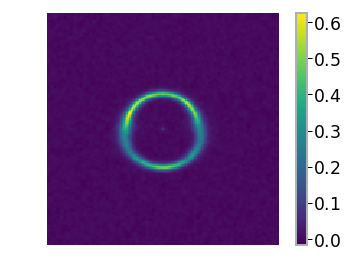

In [19]:
data = recon_src.d_ij(flat=False)
kwargs = dict(vmax=data.max(), vmin=data.min())
plt.imshow(data, **kwargs)
plt.colorbar()
plt.axis('off')
plt.show()


#### Reconstructed source plot

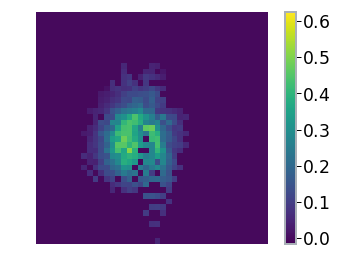

In [20]:
plt.imshow(recon_src.plane_map(), **kwargs)
plt.colorbar()
plt.axis('off')
plt.show()


#### Synthetic image plot

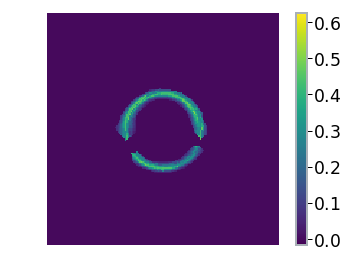

In [21]:
plt.imshow(recon_src.reproj_map(), **kwargs)
plt.colorbar()
plt.axis('off')
plt.show()


#### Masked data plot

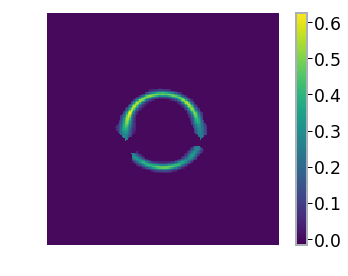

In [22]:
plt.imshow(recon_src.lens_map(mask=True), **kwargs)
plt.colorbar()
plt.axis('off')
plt.show()

#### Residual map plot

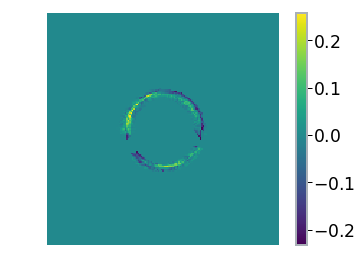

In [23]:
plt.imshow(recon_src.residual_map())  # data - synth
plt.colorbar()
plt.axis('off')
plt.show()

#### Residual statistics

In [24]:
%%skip True
print("Sum of squared residuals (ensemble avg)")
resid = recon_src.reproj_residual()
print(resid)

print("Sum of squared residuals (for the first three ensemble models)")
residuals = []
N = len(recon_src.gls.models)
for i in range(N):
    recon_src.chmdl(i)
    r = recon_src.reproj_residual()
    residuals.append(r)
print(residuals[:3])

print("0th, 10th, 25th, and 50th percentile values")
rhi10 = np.percentile(residuals, 10, interpolation='higher')
rhi25 = np.percentile(residuals, 25, interpolation='higher')
rhi50 = np.percentile(residuals, 50, interpolation='higher')
rlo = 0
print(rlo, rhi10, rhi25, rhi50)

#### Histogram of an ensemble's residual distribution
    

In [25]:
%%skip True

plt.hist(residuals, bins=35)
plt.axvline(rhi10)
plt.axvline(rhi25)
plt.axvline(rhi50)
plt.show()


#### Filtering and exporting the single state

In [26]:
%%skip True

def synth_filter(args, percentiles=[10, 25, 50]):
    pass

In [27]:
%%skip True

select10 = [i for i, r in enumerate(residuals) if rhi10 > r > rlo]
select25 = [i for i, r in enumerate(residuals) if rhi25 > r > rlo]
select50 = [i for i, r in enumerate(residuals) if rhi50 > r > rlo]
print("Number of selected models in 10th, 25th and 50th percentile")
print(len(select10))
print(len(select25))
print(len(select50))

In [28]:
%%skip True

dirname = os.path.dirname(state)
basename = ".".join(os.path.basename(state).split('.')[:-1])
save10 = dirname + '/' + basename + '_synthf10.state'
save25 = dirname + '/' + basename + '_synthf25.state'
save50 = dirname + '/' + basename + '_synthf50.state'
print("Names of filtered states...")
print(save10)
print(save25)
print(save50)


In [29]:
%%skip True

filtered_10 = filter_env(recon_src.gls, select10)
filtered_25 = filter_env(recon_src.gls, select25)
filtered_50 = filter_env(recon_src.gls, select50)
export_state(filtered_25, name=save25)
export_state(filtered_50, name=save50)


### Filtering ALL (previously unfiltered) states

In [30]:
%%skip True

# states loop
for k in keys:
    json = jsons[k][0]
    with open(json) as f:
        ml = MultiLens.from_json(f)
    for state in states[k]:
        print(json, state)

        args = (ml, state)
        kwargs = dict(M=20, verbose=1)
        recon_src = ReconSrc(*args, **kwargs)

        residuals = []
        for i in range(len(recon_src.gls.models)):
            recon_src.chmdl(i)
            r = recon_src.reproj_residual()
            residuals.append(r)
        print("\nNumber of residual models:")
        print(len(residuals))

        rhi10 = np.percentile(residuals, 10, interpolation='higher')
        rhi25 = np.percentile(residuals, 25, interpolation='higher')
        rhi50 = np.percentile(residuals, 50, interpolation='higher')
        rlo = 0
        print("\n0th, 10th, 25th, and 50th percentile values")
        print(rlo, rhi10, rhi25, rhi50)

        select10 = [i for i, r in enumerate(residuals) if rhi10 > r > rlo]
        select25 = [i for i, r in enumerate(residuals) if rhi25 > r > rlo]
        select50 = [i for i, r in enumerate(residuals) if rhi50 > r > rlo]

        print("\nNumber of selected models")
        print(len(select10))
        print(len(select25))
        print(len(select50))

        dirname = os.path.dirname(state)
        basename = ".".join(os.path.basename(state).split('.')[:-1])
        save10 = dirname + '/' + basename + '_synthf10.state'
        save25 = dirname + '/' + basename + '_synthf25.state'
        save50 = dirname + '/' + basename + '_synthf50.state'

        filtered_10 = filter_env(recon_src.gls, select10)
        filtered_25 = filter_env(recon_src.gls, select25)
        filtered_50 = filter_env(recon_src.gls, select50)

        export_state(filtered_10, name=save10)
        export_state(filtered_25, name=save25)
        export_state(filtered_50, name=save50)


### Filtering ALL (previously filtered) states

In [31]:
%%skip True

# filtered_states loop
for k in keys:
    json = jsons[k][0]
    with open(json) as f:
        ml = MultiLens.from_json(f)
    for state in filtered_states[k]:
        print(json, state)

        args = (ml, state)
        kwargs = dict(M=20, verbose=1)
        recon_src = ReconSrc(*args, **kwargs)

        residuals = []
        for i in range(len(recon_src.gls.models)):
            recon_src.chmdl(i)
            r = recon_src.reproj_residual()
            residuals.append(r)
        print("\nNumber of residual models")
        print(len(residuals))

        rhi10 = np.percentile(residuals, 10, interpolation='higher')
        rhi25 = np.percentile(residuals, 25, interpolation='higher')
        rhi50 = np.percentile(residuals, 50, interpolation='higher')
        rlo = 0
        print("\n0th, 10th, 25th, and 50th percentile values")
        print(rlo, rhi10, rhi25, rhi50)

        select10 = [i for i, r in enumerate(residuals) if rhi10 > r > rlo]
        select25 = [i for i, r in enumerate(residuals) if rhi25 > r > rlo]
        select50 = [i for i, r in enumerate(residuals) if rhi50 > r > rlo]

        print("\nNumber of subselected models")
        print(len(select10))
        print(len(select25))
        print(len(select50))

        dirname = os.path.dirname(state)
        basename = ".".join(os.path.basename(state).split('.')[:-1])
        save10 = dirname + '/' + basename + '_synthf10.state'
        save25 = dirname + '/' + basename + '_synthf25.state'
        save50 = dirname + '/' + basename + '_synthf50.state'

        filtered_10 = filter_env(recon_src.gls, select10)
        filtered_25 = filter_env(recon_src.gls, select25)
        filtered_50 = filter_env(recon_src.gls, select50)

        export_state(filtered_10, name=save10)
        export_state(filtered_25, name=save25)
        export_state(filtered_50, name=save50)


## Comparison to true EAGLE models

#### Reading the files

In [32]:
kappa_maps = {
    "H1S0A0B90G0":   [rdir+'/kappa/H1S0A0B90G0gridmap.kappa.fits'],
    "H1S1A0B90G0":   [rdir+'/kappa/H1S1A0B90G0gridmap.kappa.fits'],
    "H2S1A0B90G0":   [rdir+'/kappa/H2S1A0B90G0gridmap.kappa.fits'],
    "H2S2A0B90G0":   [rdir+'/kappa/H2S2A0B90G0gridmap.kappa.fits'],
    "H2S7A0B90G0":   [rdir+'/kappa/H2S7A0B90G0gridmap.kappa.fits'],
    "H3S0A0B90G0":   [rdir+'/kappa/H3S0A0B90G0gridmap.kappa.fits'],
    "H3S1A0B90G0":   [rdir+'/kappa/H3S1A0B90G0gridmap.kappa.fits'],
    "H4S3A0B0G90":   [rdir+'/kappa/H4S3A0B0G90gridmap.kappa.fits'],
    "H10S0A0B90G0":  [rdir+'/kappa/H10S0A0B90G0gridmap.kappa.fits'],
    "H13S0A0B90G0":  [rdir+'/kappa/H13S0A0B90G0gridmap.kappa.fits'],
    "H23S0A0B90G0":  [rdir+'/kappa/H23S0A0B90G0gridmap.kappa.fits'],
    "H30S0A0B90G0":  [rdir+'/kappa/H30S0A0B90G0gridmap.kappa.fits'],
    "H36S0A0B90G0":  [rdir+'/kappa/H36S0A0B90G0gridmap.kappa.fits'],
    "H160S0A90B0G0": [rdir+'/kappa/H160S0A90B0G0gridmap.kappa.fits'],
    "H234S0A0B90G0": [rdir+'/kappa/H234S0A0B90G0gridmap.kappa.fits']
}

In [33]:
# EAGLE models
filepath = kappa_maps["H3S0A0B90G0"][0]
# filepath = kappa_maps["H10S0A0B90G0"][0]
# filepath = kappa_maps["H36S0A0B90G0"][0]
eagle_kappa_map, eagle_hdrobj = fits.getdata(filepath, header=True)

# GLASS models
#statefile = states["H3S0A0B90G0"][0]
statefile = prefiltered_fsynth50_states["H3S0A0B90G0"][0]  # prefiltered_fsynth50_states["H3S0A0B90G0"][1]
# statefile = prefiltered_fsynth50_states["H10S0A0B90G0"][0]
# statefile = prefiltered_fsynth50_states["H36S0A0B90G0"][0]
glass_state = glass.glcmds.loadstate(statefile)
glass_state.make_ensemble_average()

kkwargs = dict(vmin=0, vmax=eagle_kappa_map.max())


#### The true EAGLE models

In [34]:
eagle_pixrad = tuple(r//2 for r in eagle_kappa_map.shape)
eagle_maprad = eagle_pixrad[1]*eagle_hdrobj['CDELT2']*3600
eagle_mapextent = ((eagle_pixrad[0]+0.5)*eagle_hdrobj['CDELT1']*3600,
                  (eagle_pixrad[1]+0.5)*eagle_hdrobj['CDELT2']*3600)
eagle_cell_size = -3600*eagle_hdrobj['CDELT1']
assert(eagle_hdrobj['CUNIT1' == 'deg'])

print("Kappa map: {}".format(eagle_kappa_map.shape))
print("Pixrad {}".format(eagle_pixrad))
print("Maprad {}".format(eagle_maprad))
print("Mapextent {}".format(eagle_mapextent))
print("Cellsize {}".format(eagle_cell_size))


Kappa map: (161, 161)
Pixrad (80, 80)
Maprad 4.0250034
Mapextent (-4.050159671249999, 4.050159671249999)
Cellsize 0.0503125425


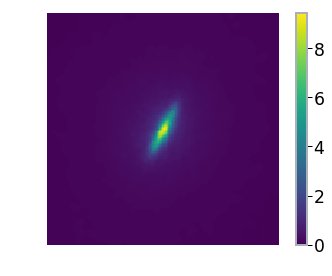

In [35]:
plt.imshow(eagle_kappa_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


#### Resample EAGLE model to match GLASS model

In [36]:
def resample_eaglemodel(eagle_model, extent, shape, verbose=False):
    """
    Resample (usually downsample) an EAGLE model's kappa grid to match the specified scales and dimensions

    Args:
        eagle_model <tuple(np.ndarray, header object)> - EAGLE model with (data, hdr)
        extent <tuple/list> - extent of the output
        shape <tuple/list> - shape of the output

    Kwargs:
        verbose <bool> - verbose mode; print command line statements

    Return:
        kappa_resmap <np.ndarray> - resampled kappa grid
    """
    kappa_map = eagle_model[0]
    hdr = eagle_model[1]

    pixrad = tuple(r//2 for r in kappa_map.shape)
    maprad = pixrad[1]*hdr['CDELT2']*3600

    xmdl = np.linspace(-maprad, maprad, kappa_map.shape[0])
    ymdl = np.linspace(-maprad, maprad, kappa_map.shape[1])
    newx = np.linspace(extent[0], extent[1], shape[0])
    newy = np.linspace(extent[2], extent[3], shape[1])

    rescale = interpolate.interp2d(xmdl, ymdl, kappa_map)
    kappa_resmap = rescale(newx, newy)
    kappa_resmap[kappa_resmap < 0] = 0

    return kappa_resmap

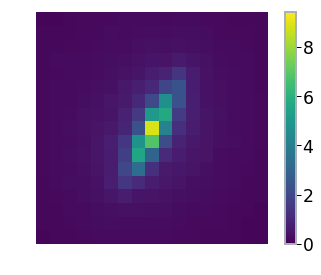

In [37]:
glass_objdta = glass_state.models[0]['obj,data'][0]
glsmdl_maprad = glass_objdta[0].basis.top_level_cell_size * (glass_objdta[0].basis.pixrad)
shape = glass_objdta[0].basis._to_grid(glass_objdta[1]['kappa'], 1).shape
extent = (-glsmdl_maprad, glsmdl_maprad, -glsmdl_maprad, glsmdl_maprad)
eagle_kappa_resmap = resample_eaglemodel(fits.getdata(filepath, header=True), extent, shape)

plt.imshow(eagle_kappa_resmap, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


#### Residuals (EAGLE2GLASS)

In [38]:
glass_objdta = glass_state.models[0]['obj,data'][0]
glass_kappa_map = glass_objdta[0].basis._to_grid(glass_objdta[1]['kappa'], 1)

resid_map = eagle_kappa_resmap - glass_kappa_map
resid2_map = resid_map * resid_map
r = np.sum(resid2_map)
print(r)


170.35265180618694


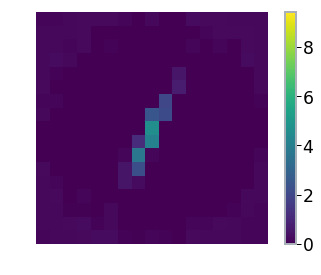

In [39]:
plt.imshow(resid_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


#### Comparison loop for a single model (EAGLE2GLASS)

In [40]:
N_models = len(glass_state.models)
print("N models {}".format(N_models))

kappa_resids = []
eagle_model = fits.getdata(filepath, header=True)
for m in glass_state.models:
    objdta = m['obj,data'][0]
    glass_kappa_map = objdta[0].basis._to_grid(objdta[1]['kappa'], 1)
    maprad = objdta[0].basis.top_level_cell_size * (objdta[0].basis.pixrad)
    shape = glass_kappa_map.shape
    extent = (-maprad, maprad, -maprad, maprad)

    kappa_resmap = resample_eaglemodel(eagle_model, extent, shape)

    # residuals
    resid_map = kappa_resmap - glass_kappa_map
    resid2_map = resid_map * resid_map
    r = np.sum(resid2_map)
    kappa_resids.append(r)

minidx = np.argmin(kappa_resids)
print("Best fitting model index: {}".format((minidx, kappa_resids[minidx])))
print(kappa_resids)


N models 80
Best fitting model index: (58, 129.21822865764682)
[170.35265180618694, 182.64847379179747, 138.31806845530792, 134.13750176388683, 146.79527253478778, 167.88003883059378, 168.33173308590838, 161.66557944902794, 161.78546015103166, 173.43480751596897, 138.05414354359053, 167.08675763466704, 158.86935300527665, 166.52530348005578, 152.36810631727525, 157.46440238279894, 169.03960154571735, 159.8342961945052, 138.06185221899744, 149.76938277060367, 162.36802545168126, 167.12338130302143, 152.61818533766666, 165.54468323510852, 163.16546729057774, 145.2246845529784, 159.73455429739377, 140.70469256754546, 155.03472766288303, 160.40437950371782, 166.48958539557248, 164.6230546668035, 157.17463237817995, 152.906504331697, 151.4431821412732, 153.76111739438807, 161.90142650726688, 179.6624644073611, 137.3788844954596, 139.1999144657284, 153.68868922423246, 146.05545001453805, 158.3933200521947, 161.68041797345398, 140.6222177135205, 156.7127234688569, 142.14771675098478, 147.2497

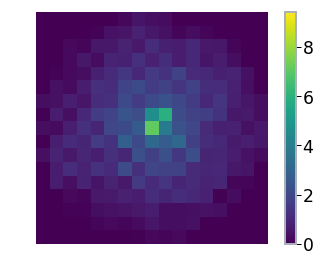

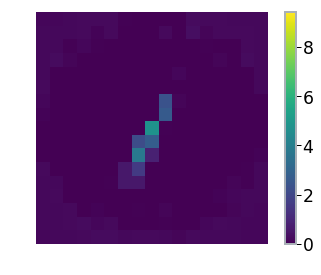

In [41]:
objdta = glass_state.models[minidx]['obj,data'][0]
min_kappa_map = objdta[0].basis._to_grid(objdta[1]['kappa'], 1)
maprad = objdta[0].basis.top_level_cell_size * (objdta[0].basis.pixrad)
shape = min_kappa_map.shape
extent = (-maprad, maprad, -maprad, maprad)

kappa_resmap = resample_eaglemodel(eagle_model, extent, shape)

resid_map = kappa_resmap - glass_kappa_map
resid2_map = resid_map * resid_map

plt.imshow(min_kappa_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()

plt.imshow(resid_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()

#### The GLASS models

In [42]:
glass_model = glass_state.models[0]
glassobj, glassdta = glass_model['obj,data'][0]
glass_kappa_map = glassobj.basis._to_grid(glassdta['kappa'], 1)

glass_pixrad = glassobj.basis.pixrad
glass_maprad = glassobj.basis.top_level_cell_size * (glassobj.basis.pixrad)
glass_mapextent = (-glassobj.basis.top_level_cell_size * (glassobj.basis.pixrad+0.5),
                 glassobj.basis.top_level_cell_size * (glassobj.basis.pixrad+0.5))
glass_cell_size = glassobj.basis.top_level_cell_size

print("Kappa map: {}".format(glass_kappa_map.shape))
print("Pixrad {}".format(glass_pixrad))
print("Maprad {}".format(glass_maprad))
print("Mapextent {}".format(glass_mapextent))
print("Cellsize {}".format(glass_cell_size))


Kappa map: (17, 17)
Pixrad 8
Maprad 1.92088393832
Mapextent (-2.0409391844677707, 2.0409391844677707)
Cellsize 0.24011049229


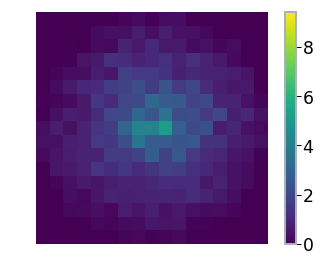

In [43]:
# kkwargs = dict()
plt.imshow(glass_kappa_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


1
1


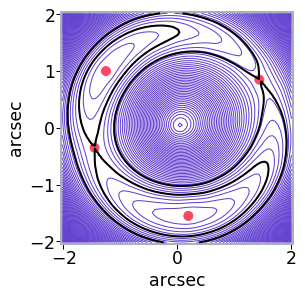

In [44]:
glass_state.img_plot(obj_index=0, color='#fe4365')
glass_state.arrival_plot(glass_state.ensemble_average, obj_index=0, only_contours=True,
                         clevels=75, colors=['#603dd0'])
glass_state.arrival_plot(glass_state.ensemble_average, obj_index=1, only_contours=True,
                         clevels=50, colors=['#da9605'])
plt.show()

#### Resample GLASS model to match EAGLE model

In [45]:
def resample_glassmodel(gls_model, extent, shape, verbose=False):
    """
    Resample (usually upsample) a GLASS model's kappa grid to match the specified scales and dimensions

    Args:
        gls_model <glass.LensModel object> - GLASS ensemble model
        extent <tuple/list> - extent of the output
        shape <tuple/list> - shape of the output

    Kwargs:
        verbose <bool> - verbose mode; print command line statements

    Return:
        kappa_resmap <np.ndarray> - resampled kappa grid
    """
    obj, data = gls_model['obj,data'][0]
    kappa_map = obj.basis._to_grid(data['kappa'], 1)
    pixrad = obj.basis.pixrad
    maprad = obj.basis.top_level_cell_size * (obj.basis.pixrad)
    mapextent = (-obj.basis.top_level_cell_size * (obj.basis.pixrad+0.5),
                 obj.basis.top_level_cell_size * (obj.basis.pixrad+0.5))
    cell_size = obj.basis.top_level_cell_size

    if verbose:
        print(obj)
        print("Kappa map: {}".format(kappa_map.shape))
        print("Pixrad {}".format(pixrad))
        print("Maprad {}".format(maprad))
        print("Mapextent {}".format(mapextent))
        print("Cellsize {}".format(cell_size))

    xmdl = np.linspace(-maprad, maprad, kappa_map.shape[0])
    ymdl = np.linspace(-maprad, maprad, kappa_map.shape[1])
    Xmdl, Ymdl = np.meshgrid(xmdl, ymdl)
    xnew = np.linspace(extent[0], extent[1], shape[0])
    ynew = np.linspace(extent[2], extent[3], shape[1])
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    rescale = interpolate.Rbf(Xmdl, Ymdl, kappa_map)
    kappa_resmap = rescale(Xnew, Ynew)
    kappa_resmap[kappa_resmap < 0] = 0

    return kappa_resmap


In [46]:
eagle_pixrad = tuple(r//2 for r in eagle_kappa_map.shape)
eagle_maprad = eagle_pixrad[1]*eagle_hdrobj['CDELT2']*3600
shape = eagle_kappa_map.shape
extent = [-eagle_maprad, eagle_maprad, -eagle_maprad, eagle_maprad]
glass_kappa_resmap = resample_glassmodel(glass_state.models[0], extent, shape)


In [47]:
%%skip True

x = np.linspace(-mdl_maprad, mdl_maprad, mdl_kappa_map.shape[0])
y = np.linspace(-mdl_maprad, mdl_maprad, mdl_kappa_map.shape[1])
newx = np.linspace(-eagle_maprad, eagle_maprad, eagle_kappa_map.shape[0])
newy = np.linspace(-eagle_maprad, eagle_maprad, eagle_kappa_map.shape[1])

rescale = interpolate.interp2d(x, y, mdl_kappa_map, kind='linear')
# rescale = interpolate.RectBivariateSpline(x, y, mdl_kappa_map)
glass_kappa_resmap = rescale(newx, newy)


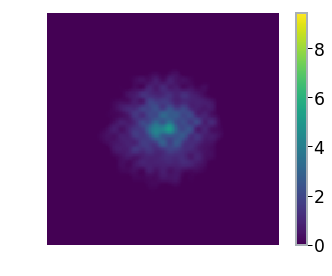

In [48]:
plt.imshow(glass_kappa_resmap, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


#### Residuals (GLASS2EAGLE)

In [49]:
resid_map = eagle_kappa_map - glass_kappa_resmap
resid2_map = resid_map * resid_map
r = np.sum(resid2_map)
print(r)


4189.557980915198


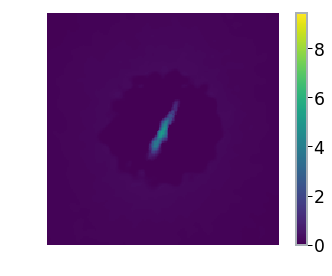

In [50]:
plt.imshow(resid_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


#### Comparison loop for a single model (GLASS2EAGLE)

In [51]:
N_models = len(glass_state.models)
print("N models {}".format(N_models))

kappa_resids = []
extent = [-eagle_maprad, eagle_maprad, -eagle_maprad, eagle_maprad]
for m in glass_state.models:
    mdl_kappa_resmap = resample_glassmodel(m, extent, eagle_kappa_map.shape)

    # residuals
    resid_map = eagle_kappa_map - mdl_kappa_resmap
    resid2_map = resid_map * resid_map
    r = np.sum(resid2_map)
    kappa_resids.append(r)

minidx = np.argmin(kappa_resids)
print("Best fitting model index: {}".format((minidx, kappa_resids[minidx])))
print(kappa_resids)


N models 80
Best fitting model index: (39, 3381.8711365672357)
[4189.557980915198, 4474.359934029696, 3517.9053878721784, 3470.049024682088, 3798.563090338489, 4274.874352167857, 4177.262047740651, 4000.1180353506484, 4060.4012610282507, 4333.017746031668, 3531.4969296826853, 4205.819837816248, 4095.9077805407296, 4207.795429604903, 3813.9140002479926, 3952.1525385751047, 4211.640785531204, 4054.4665883062953, 3575.7196603996586, 3780.0347842398405, 4138.508665300561, 4075.9612537609064, 3873.9915677047516, 4161.092407239878, 4089.9009159441116, 3680.694745913577, 3963.9363509899454, 3556.3470992323246, 3858.357702640037, 3959.9138279531435, 4210.329566626722, 4139.22149473735, 4012.7267469357253, 3872.8854572749606, 3751.6868393029913, 3891.368728280051, 4020.2093818474127, 4328.311156399502, 3429.5528181884897, 3381.8711365672357, 3885.5130393281756, 3663.5980661301046, 3888.81378238494, 4083.980521777033, 3596.1280164112404, 4035.5178805144437, 3671.2983769871853, 3742.449441097773,

<glass.environment.Object instance at 0x10f7c7098>
Kappa map: (17, 17)
Pixrad 8
Maprad 1.92088393832
Mapextent (-2.0409391844677707, 2.0409391844677707)
Cellsize 0.24011049229


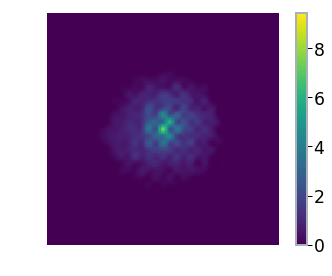

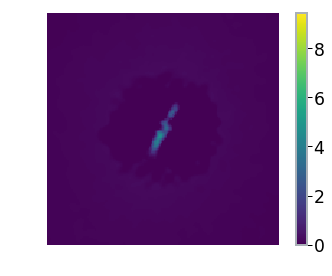

In [53]:

min_kappa_map = resample_glassmodel(glass_state.models[minidx], extent, eagle_kappa_map.shape)
resid_map = eagle_kappa_map - min_kappa_map
resid2_map = np.sqrt(resid_map * resid_map)

plt.imshow(min_kappa_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()

plt.imshow(resid_map, **kkwargs)
plt.colorbar()
plt.gca().axis('off')
plt.show()


## Check COM